# Motion Capture Data Analysis - NM15

## Libraries
Installing and importing libraries for data processing, sound analysis and visualization. 

In [239]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa #Sound analysis

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [240]:
!{sys.executable} -m pip install chart_studio  #Librosa plots

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [253]:
!{sys.executable} -m pip install numba

  Using cached https://files.pythonhosted.org/packages/ac/7d/e01bcbf4a35cbb07ce04aaa545030bde231331aaabe7c44726b099f8fd86/numba-0.49.1-cp36-cp36m-macosx_10_14_x86_64.whl
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [254]:
import numba

In [1]:
import pandas as pd
import numpy as np
#import librosa
#import librosa.display
import matplotlib
import random
%matplotlib inline
import csv
import glob
import os
import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg
import chart_studio

%load_ext rpy2.ipython

#r packages
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector
stats = importr('stats')
base = importr('base')

from scipy import stats
import seaborn
from IPython.display import display, Markdown


## Reading Motion Capture Data into Pandas Dataframes

In [17]:
#Reading QTOM generated tsv files (one for each group of participants) from local drive

nm15raw = {}

path = r'/Users/vesanche/Desktop/IMV UiO/NM/2015 NM/data/mocap/NM15_tsv/' # use your path for the folder containing mocap files
nm_files = sorted(glob.glob(os.path.join(path, "*.tsv")))

i=1

for filename in nm_files:
    nm15raw[i] = pd.read_csv(filename, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
    nm15raw[i].drop(nm15raw[i].columns[len(nm15raw[i].columns)-1], axis=1, inplace=True)
    i = i+1



In [42]:
#Example: Group1. All participants. Last columns correspond to the reference markers placed on static tripods
nm15raw[12]


,S5 X,S5 Y,S5 Z,S6 X,S6 Y,S6 Z,S7 X,S7 Y,S7 Z,Corner2 X,Corner2 Y,Corner2 Z,Corner3 X,Corner3 Y,Corner3 Z
0,-1294.673,-21.461,1713.973,-168.792,-253.017,1823.638,605.051,-339.553,1648.286,2078.743,1542.446,1861.999,2121.365,-893.354,1873.581
1,-1294.734,-21.484,1713.966,-168.784,-252.969,1823.642,605.016,-339.496,1648.271,2078.259,1542.214,1861.762,2121.296,-893.333,1873.566
2,-1294.808,-21.550,1713.944,-168.750,-252.958,1823.627,604.987,-339.464,1648.275,2078.267,1542.230,1861.766,2121.367,-893.341,1873.569
3,-1294.818,-21.751,1713.938,-168.742,-252.944,1823.625,604.951,-339.452,1648.277,2078.173,1542.240,1861.722,2121.327,-893.401,1873.621
4,-1294.854,-21.821,1713.920,-168.721,-252.922,1823.647,604.891,-339.393,1648.276,2078.183,1542.250,1861.728,2121.273,-893.387,1873.606
5,-1294.883,-21.900,1713.929,-168.697,-252.897,1823.629,604.849,-339.358,1648.267,2078.183,1542.250,1861.728,2121.219,-893.362,1873.581
6,-1294.934,-21.997,1713.966,-168.675,-252.874,1823.625,604.782,-339.286,1648.282,2078.733,1542.475,1861.995,2121.273,-893.387,1873.606
7,-1294.951,-22.102,1713.983,-168.670,-252.838,1823.634,604.722,-339.232,1648.285,2078.811,1542.507,1862.033,2121.248,-893.375,1873.613
8,-1294.957,-22.221,1714.011,-168.633,-252.821,1823.621,604.677,-339.189,1648.281,2078.251,1542.272,1861.760,2121.272,-893.388,1873.607
9,-1295.010,-22.323,1714.063,-168.608,-252.804,1823.622,604.632,-339.133,1648.284,2078.225,1542.267,1861.748,2121.210,-893.354,1873.585


## Extracting individuals from groups and nesting in dictionaries

In [21]:
nm15 = {}
Fs = 100 #sampling frequency of the Mocap system during NM15 (fps)    
num_groups = len(nm15raw)
    

for g_id in range(1,num_groups+1):
    nm15[g_id] = {}
    j = 0
    k = 0
    for i in range (3,len(nm15raw[g_id].columns)+3,3):
        j = j+1
        nm15[g_id][j] = nm15raw[g_id].iloc[:,k:i:1]
        nm15[g_id][j].columns = ['X', 'Y', 'Z']
        time = np.linspace(0, len(nm15raw[g_id])/Fs, len(nm15raw[g_id]))
        nm15[g_id][j].insert(0, 'Time (s)', time)
        k = k+3

In [23]:
nm15[1][5] #data from group 1, participant 5 with time column

,Time (s),X,Y,Z
0,0.000000,-1184.425,196.768,1595.694
1,0.010000,-1184.403,196.736,1595.715
2,0.020001,-1184.367,196.729,1595.746
3,0.030001,-1184.307,196.639,1595.772
4,0.040001,-1184.249,196.616,1595.766
5,0.050001,-1184.142,196.642,1595.775
6,0.060002,-1184.196,196.715,1595.839
7,0.070002,-1184.157,196.685,1595.887
8,0.080002,-1184.111,196.697,1595.913
9,0.090003,-1184.065,196.661,1595.920


## Calculating variables for analysis (displacement, velocity, quantity of motion)

### Calculating displacement (change of position)

In [24]:
def displacement(position):

    displacement = (
        np.roll(position, -1, axis=0)
        - position)
    displacement = displacement.drop(displacement.index[len(displacement)-1])
    
    displacement.index =  position['Time (s)'][1:]
    
    return displacement


In [25]:
displacements = {}    

for groups in range(1,num_groups+1):
    displacements[groups] = {}
    
    for i in range(1,len(nm15[groups]) + 1):
        displacements[groups][i] = displacement(nm15[groups][i])
        displacements[groups][i]['timestep (s)'] = displacements[groups][i]['Time (s)']
        displacements[groups][i] = displacements[groups][i].drop(['Time (s)'], axis=1)
        

In [26]:
displacements[1][1] #displacement for group 1, participant 1

,X,Y,Z,timestep (s)
Time (s),,,,
0.010000,-0.071,0.095,0.002,0.01
0.020001,-0.062,0.091,0.013,0.01
0.030001,-0.029,0.015,-0.023,0.01
0.040001,-0.047,0.091,-0.002,0.01
0.050001,0.007,0.181,0.046,0.01
0.060002,-0.005,0.047,-0.044,0.01
0.070002,-0.044,0.105,0.005,0.01
0.080002,-0.026,0.110,-0.018,0.01
0.090003,-0.031,0.093,-0.010,0.01


### Plotting displacement


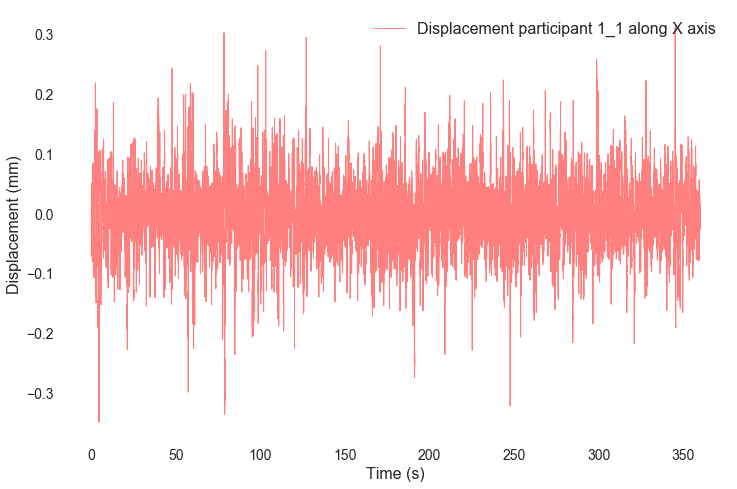

In [27]:
fig5, ax5 = plt.subplots(1)
fig5.set_figheight(8)
fig5.set_figwidth(12)
ax5.set_facecolor("white")
ax5.plot(displacements[1][1]['X'], lw=1, label='Displacement participant 1_1 along X axis', color='red', alpha=0.5) #Displacement on x axis

plt.tick_params(axis='both', which='major', labelsize=14)
ax5.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Displacement (mm)', fontsize=16);

### Calculating norm of displacement

In [28]:
def disp_norm(displacement):
  
       
    dispnorm = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    )
    
    return pd.DataFrame({
        'Norm of Displacement': dispnorm,
    })

In [29]:
disp_norms = {}    

for groups in range(1,num_groups+1):
    disp_norms[groups] = {}
    
    for i in range(1,len(nm15[groups])+1):
        disp_norms[groups][i] = disp_norm(displacements[groups][i])

In [30]:
disp_norms[1][1]

,Norm of Displacement
Time (s),
0.010000,0.118617
0.020001,0.110878
0.030001,0.039937
0.040001,0.102440
0.050001,0.186885
0.060002,0.064576
0.070002,0.113956
0.080002,0.114455
0.090003,0.098539


### Distance travelled
Cummulative distance travelled

In [43]:
#Concatenating norm of displacement for all participants in each group
disp_norms_group = {}
for group_id in range (1,num_groups+1):
    disp_norms_group[group_id] = pd.concat(disp_norms[group_id],1)
   
    

In [44]:
disp_norms_group[1]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement
Time (s),,,,,,,,,,,,,,,,
0.010000,0.118617,0.280653,0.117307,2.304587,0.044147,0.262728,0.071512,0.033000,0.454041,0.055687,0.050695,0.109923,0.014799,0.013153,0.021307,0.087841
0.020001,0.110878,0.260425,0.143548,0.028531,0.048021,0.280416,0.058429,0.053188,0.043428,0.053842,0.067328,0.110946,0.018894,0.039128,0.038639,0.000000
0.030001,0.039937,0.270537,0.189021,0.507644,0.111247,0.306938,0.072498,0.165442,0.106118,0.037696,0.161078,0.090747,0.000000,0.088657,0.141669,0.105138
0.040001,0.102440,0.267215,0.189214,0.020905,0.062682,0.274069,0.057245,0.021772,0.069469,0.088555,0.046872,0.082395,0.000000,0.021190,0.108522,0.000000
0.050001,0.186885,0.194669,0.356759,0.104680,0.110481,0.302673,0.089398,0.095603,0.070753,0.026721,0.144821,0.134774,0.050249,0.010863,0.049254,0.051624
0.060002,0.064576,0.338033,0.080716,0.571842,0.111090,0.294708,0.061814,0.139617,0.300468,0.252184,0.062618,0.119269,0.005831,0.005477,0.015652,0.136971
0.070002,0.113956,0.298721,0.138253,0.535673,0.068739,0.244283,0.064327,0.277191,0.067320,0.093499,0.055893,0.079505,0.005831,0.128168,0.020640,0.062746
0.080002,0.114455,0.194299,0.214516,0.052745,0.054185,0.239625,0.023345,0.035228,0.120300,0.057105,0.068891,0.131507,0.009695,0.092871,0.004123,0.062418


Text(0.5, 1.0, 'Distance travelled for all participants and reference markers, Group 1')

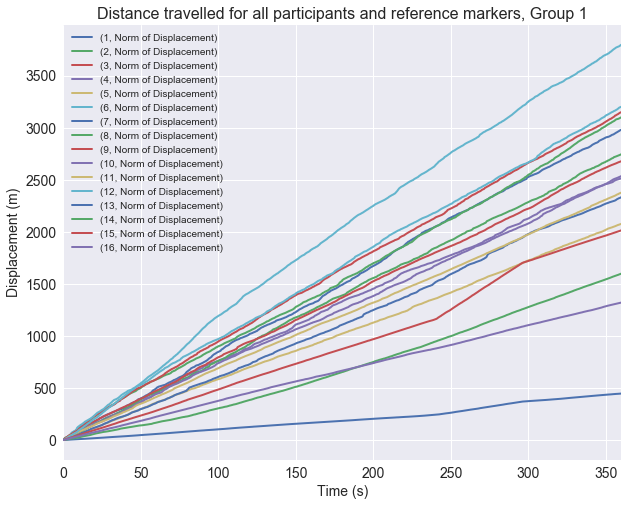

In [47]:
disp_norms_group[1].cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Displacement (mm)', fontsize=14);
plt.legend(loc='upper left', fontsize=10)
plt.title('Distance travelled for all participants and reference markers, Group 1', fontsize=16)

### Plotting the planar displacement

(array([160., 170., 180., 190., 200., 210., 220., 230.]),
 <a list of 8 Text yticklabel objects>)

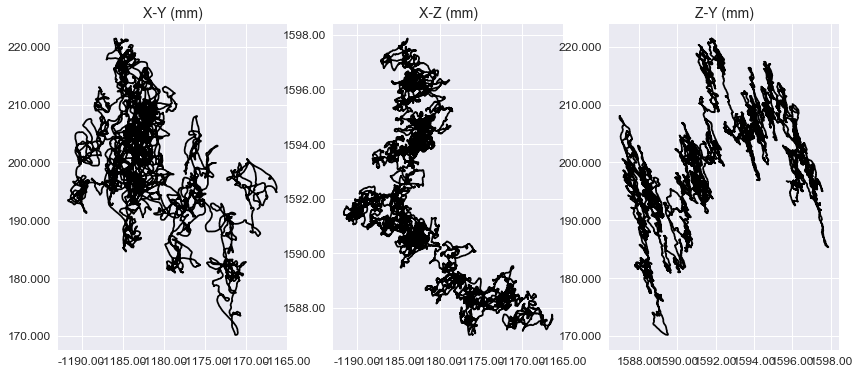

In [154]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(nm15[1][5]['X'], nm15[1][5]['Y'], color='k') #XY plane participant 5, group 1
plt.title('X-Y (mm)', fontsize=14)
aa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
aa.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ab = plt.subplot(1, 3, 2)
plt.plot(nm15[1][5]['X'], nm15[1][5]['Z'], color='k') #XZ plane participant 5, group 1
plt.title('X-Z (mm)', fontsize=14)
ab.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ab.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ac = plt.subplot(1, 3, 3)
plt.plot(nm15[1][5]['Z'], nm15[1][5]['Y'], color='k') #ZY plane participant 5, group 1
plt.title('Z-Y (mm)', fontsize=14)
ac.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ac.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#fig.savefig("paths.pdf", bbox_inches='tight')

### Calculating velocity in X, Y, and Z directions
Defining and running functions to calculate velocity

In [51]:
def x_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel X': vel,
    })

In [52]:
def y_vel(displacement):
   
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Y ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Y': vel,
    })

In [53]:
def z_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Z ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Z': vel,
    })

In [55]:

velx = {} #anterior-posterior (AP)
vely = {} #mediolateral (ML)
velz = {} #vertical (SI)

for groups in range(1,num_groups+1):
    velx[groups] = {}
    vely[groups] = {}
    velz[groups] = {}
    
    for i in range(1,len(nm15[groups])+1):
        velx[groups][i] = x_vel(displacements[groups][i])
        vely[groups][i] = y_vel(displacements[groups][i])
        velz[groups][i] = z_vel(displacements[groups][i])

In [56]:
velx[1][2] #velocity in the AP direction for participant 1_2

,Vel X
Time (s),
0.010000,21.099414
0.020001,17.199522
0.030001,17.299519
0.040001,17.399517
0.050001,11.799672
0.060002,0.099997
0.070002,23.999333
0.080002,9.399739
0.090003,9.199744


### Calculating norm of velocity (QoM)

In [57]:
def velocity_norm(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    ) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Velocity': vel,
    })
       

In [58]:
velocities = {}    

for groups in range(1,num_groups+1):
    velocities[groups] = {}
    
    for i in range(1,len(nm15[groups])+1):
        velocities[groups][i] = velocity_norm(displacements[groups][i])

In [59]:
velocities[1][5] #displaying velocity for group 1, participant 5

,Velocity
Time (s),
0.010000,4.414625
0.020001,4.801949
0.030001,11.124438
0.040001,6.267999
0.050001,11.047770
0.060002,11.108697
0.070002,6.873673
0.080002,5.418336
0.090003,5.882863


In [61]:
#Concatenating velocities for all participants in each group
vels_group = {}
velsx_group = {}
velsy_group = {}
velsz_group = {}

for group_id in range(1,num_groups+1):
    vels_group[group_id] = pd.concat(velocities[group_id],1)
    velsx_group[group_id] = pd.concat(velx[group_id],1)
    velsy_group[group_id] = pd.concat(vely[group_id],1)
    velsz_group[group_id] = pd.concat(velz[group_id],1)
    
    ID_group = list(range(1,(len(vels_group[group_id].columns)+1)))
    
    vels_group[group_id].columns = ID_group
    velsx_group[group_id].columns = ID_group
    velsy_group[group_id].columns = ID_group
    velsz_group[group_id].columns = ID_group

In [62]:
vels_group[1] #QoM

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Time (s),,,,,,,,,,,,,,,,
0.010000,11.861374,28.064501,11.730403,230.452293,4.414625,26.272070,7.151025,3.299908,45.402813,5.568508,5.069376,10.991965,1.479824,1.315258,2.130668,8.783833
0.020001,11.087523,26.041742,14.354391,2.852989,4.801949,28.040797,5.842782,5.318687,4.342690,5.384087,6.732569,11.094285,1.889392,3.912691,3.863828,0.000000
0.030001,3.993634,27.052899,18.901591,50.762947,11.124438,30.692958,7.249626,16.543724,10.611491,3.769511,16.107315,9.074438,0.000000,8.865418,14.166469,10.513508
0.040001,10.243738,26.720785,18.920891,2.090396,6.267999,27.406172,5.724350,2.177094,6.946749,8.855261,4.687086,8.239310,0.000000,2.118903,10.851887,0.000000
0.050001,18.687980,19.466354,35.674911,10.467756,11.047770,30.266468,8.939550,9.560069,7.075113,2.672004,14.481656,13.477014,5.024798,1.086248,4.925307,5.162220
0.060002,6.457374,33.802315,8.071331,57.182588,11.108697,29.470014,6.181252,13.961346,30.045962,25.217745,6.261615,11.926529,0.583079,0.547707,1.565204,13.696700
0.070002,11.395297,29.871231,13.824955,53.565853,6.873673,24.427584,6.432550,27.718357,6.731826,9.349607,5.589120,7.950251,0.583079,12.816430,2.063919,6.274377
0.080002,11.445205,19.429334,21.450977,5.274320,5.418336,23.961805,2.334459,3.522685,12.029628,5.710358,6.888930,13.150300,0.969509,9.286830,0.412299,6.241621
0.090003,9.853660,19.117262,22.343506,5.894749,5.882863,24.419191,2.672004,2.002443,16.842632,3.940703,2.906808,11.937005,0.141417,0.199994,6.558019,6.171538


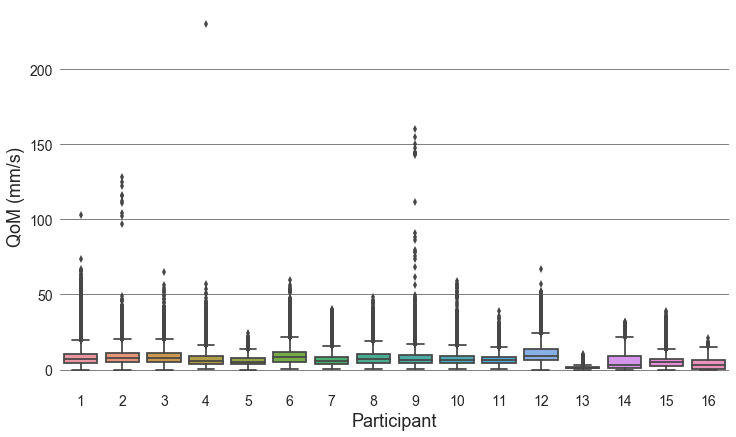

In [64]:
#Box plot of QoM

figbox, axbox = plt.subplots(figsize=(12,7))
qombox = seaborn.boxplot(ax=axbox, data=vels_group[1], width=0.8) #QoM box plot for Group 1
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
qombox.set_xlabel("Participant",fontsize=18)
qombox.set_ylabel("QoM (mm/s)",fontsize=18)
qombox.tick_params(labelsize=14)

### Smoothing velocity
Calculating the envelope of the velocity using a rolling average

In [65]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(nm15[groups])+1):
        velenv[groups][i] = vels_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()

In [69]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

In [191]:
vel_envx_group[1] #smoothed velocities group 1

,1,2,3,4,5
Time (s),,,,,
0.005000,11.511840,3.839947,8.269885,5.293926,7.141901
0.010000,11.457267,3.821729,8.231569,5.289035,7.191979
0.015000,11.425332,3.790143,8.233219,5.274437,7.144999
0.020000,11.401783,3.764996,8.207653,5.275655,7.131940
0.025000,11.382534,3.765332,8.238347,5.255696,7.124901
0.030000,11.293176,3.750424,8.245600,5.253260,7.089425
0.035000,11.256447,3.792400,8.171585,5.220682,7.064053
0.040001,11.169938,3.799947,8.192410,5.231703,7.059715
0.045001,11.105401,3.777725,8.183220,5.235112,7.031384


Text(0.5, 1.0, 'Velocity (QoM) participant 1_5')

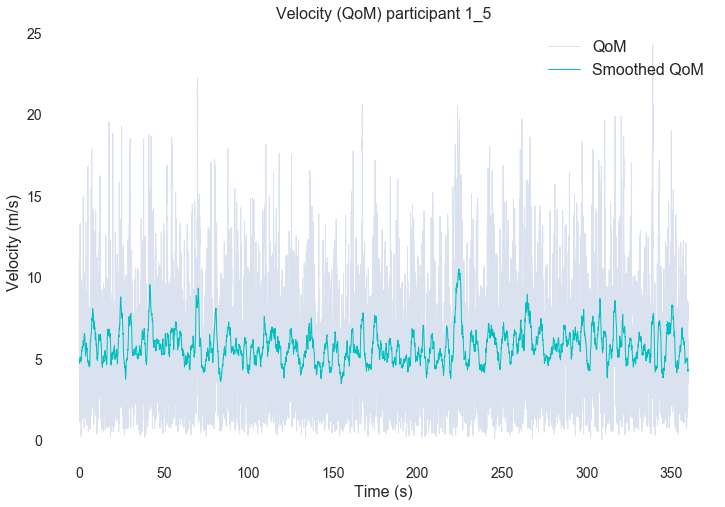

In [150]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(12)
ax.set_facecolor("white")
ax.plot(vels_group[1][5], lw=1, label='QoM', alpha=0.2)
ax.plot(velenv[1][5], lw=1, label='Smoothed QoM', color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (m/s)', fontsize=16);
plt.title('Velocity (QoM) participant 1_5', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants in Group 1')

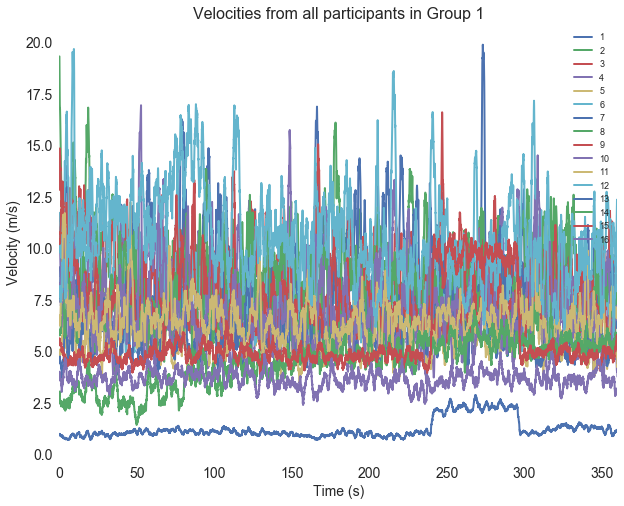

In [70]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[1].plot(figsize=(10,8), linewidth=2, fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (m/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants and reference markers in Group 1', fontsize=16)

### Mean of Norm of the Velocity (mean QoM)

In [72]:
#Mean of cleaned velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(nm15[groups])+1):
        velocities[groups][i].loc['mean'] = velocities[groups][i].mean()

## Segmenting data by conditions and stimuli
Using the order of presentation of stimuli for each group to segment full trials into conditions (music-silence), and stimuli

In [73]:
#Stimuli presentation order.
nm15songorder = pd.read_csv('/Users/vesanche/Desktop/IMV UiO/NM/2015 NM/data/soundfiles/nm15songorder.csv') #read the stimuli order file
nm15songorder.columns = ['Group','1', '2', '3','4']
nm15songorder.set_index('Group',inplace=True, drop=True) #Displaying song order table
nm15songorder

,1,2,3,4
Group,,,,
A,3,1,2,4
B,1,2,4,3
C,1,2,3,4
D,2,3,4,1
E,1,2,3,4
F,3,1,2,4
G,3,2,4,1
H,3,2,4,1
I,3,1,2,4


### Segmenting group data based on the order and duration of stimuli

In [94]:
def segments(data):
    #First and last segments always were Silence - 60s
    #1 - Middle Silence - 60s
    #2 - Meditation - 60s
    #3 - Salsa - 60s
    #4 - EDM - 60s
    #Total duration of recording 360s
   
    k = 1        
    segments = {}
    for i in range (0,len(data),6000):
        segments[k]= data.iloc[i : i + 6000]
        k = k+1
    return segments

### Segmenting raw and smoothed Velocity (QoM)

In [95]:
QoM_segmented = {}
QoMX_segmented = {}
QoMY_segmented = {}
QoMZ_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_segmented[group_id] = segments(vels_group[group_id])
    QoMX_segmented[group_id] = segments(velsx_group[group_id])
    QoMY_segmented[group_id] = segments(velsy_group[group_id])
    QoMZ_segmented[group_id] = segments(velsz_group[group_id])
    
QoM_smooth_segmented = {}
QoMX_smooth_segmented = {}
QoMY_smooth_segmented = {}
QoMZ_smooth_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_smooth_segmented[group_id] = segments(vel_env_group[group_id])
    QoMX_smooth_segmented[group_id] = segments(vel_envx_group[group_id])
    QoMY_smooth_segmented[group_id] = segments(vel_envy_group[group_id])
    QoMZ_smooth_segmented[group_id] = segments(vel_envz_group[group_id])

In [107]:
QoM_segmented[1][2] #Displaying QoM data for group 1, segment 2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Time (s),,,,,,,,,,,,,,,,
60.011667,10.024192,2.501930,9.810946,11.007419,11.422467,4.788395,8.329835,18.711241,3.905016,8.377715,6.343324,16.343964,0.768093,3.770837,3.624813,1.774775
60.021667,9.377372,3.112790,9.062860,10.807567,10.447198,4.161615,9.262032,15.914645,1.232849,8.338233,6.969024,6.886027,0.768093,3.770837,5.036724,5.245805
60.031668,7.963446,2.607609,10.241786,14.008180,10.658503,5.707731,12.751508,15.755196,14.295406,7.650278,6.475158,8.122582,1.479824,2.968082,6.610414,6.179634
60.041668,6.120287,2.515879,10.711378,11.879485,9.816040,4.862991,10.055565,15.054481,15.303496,9.883045,5.536090,8.916030,1.479824,3.849568,6.642857,6.179634
60.051668,7.887746,1.431742,7.539684,13.041493,11.526171,4.588990,10.230063,15.251461,1.824778,8.042786,2.838935,8.356801,1.479824,6.096551,0.761556,0.000000
60.061668,8.080617,1.791598,8.010395,12.939888,7.457675,6.074368,6.986221,11.189417,14.661448,6.597544,7.869978,8.290729,0.000000,7.345543,7.343501,1.774775
60.071669,11.414585,1.982368,10.249106,15.212072,7.783742,4.662488,6.969024,13.339045,12.122369,2.880892,1.720417,11.985075,0.768093,1.077003,5.978128,7.426772
60.081669,13.892778,5.890507,8.544937,14.115202,5.735693,7.603078,7.596499,10.964184,3.184248,6.014814,9.304579,14.075830,1.414174,3.049505,2.247158,0.000000
60.091669,12.482041,5.713859,10.322988,13.184474,6.090808,7.420710,6.578571,11.781014,6.754070,2.229288,4.688153,12.459590,1.479824,9.471273,2.852989,7.384915


### Grouping data into first and last silence and middle segments

In [117]:
#Odd segments are silence, even segments are music
QoM_segmented_mid = {} #creating empty dictionaries for data between first and last silences - raw
QoMX_segmented_mid = {}
QoMY_segmented_mid = {}
QoMZ_segmented_mid = {}

QoM_segmented_sil = {} #creating empty dictionaries for data from first and last silences - raw
QoMX_segmented_sil = {}
QoMY_segmented_sil = {}
QoMZ_segmented_sil = {}

QoM_smooth_segmented_mid = {} #creating empty dictionaries for data between first and last silences - smooth
QoMX_smooth_segmented_mid = {}
QoMY_smooth_segmented_mid = {}
QoMZ_smooth_segmented_mid = {}

QoM_smooth_segmented_sil = {}  #creating empty dictionaries for data from first and last silences - smooth
QoMX_smooth_segmented_sil = {}
QoMY_smooth_segmented_sil = {}
QoMZ_smooth_segmented_sil = {}


for group_id in range(1,num_groups+1):
  QoM_segmented_mid[group_id] = {} 
  QoMX_segmented_mid[group_id] = {}
  QoMY_segmented_mid[group_id] = {}
  QoMZ_segmented_mid[group_id] = {}
  
  QoM_segmented_sil[group_id] = {}  
  QoMX_segmented_sil[group_id] = {}
  QoMY_segmented_sil[group_id] = {}
  QoMZ_segmented_sil[group_id] = {}
  
  QoM_smooth_segmented_mid[group_id] = {}  
  QoMX_smooth_segmented_mid[group_id] = {}
  QoMY_smooth_segmented_mid[group_id] = {}
  QoMZ_smooth_segmented_mid[group_id] = {}
  
  QoM_smooth_segmented_sil[group_id] = {}   
  QoMX_smooth_segmented_sil[group_id] = {}
  QoMY_smooth_segmented_sil[group_id] = {}
  QoMZ_smooth_segmented_sil[group_id] = {}
  
  k = 0
  ksil=0
  
  for j in range (1,7,5):
    QoM_segmented_sil[group_id][ksil] = QoM_segmented[group_id][j] #filling each participant's dictionary with first and last segments (silence)
    QoM_smooth_segmented_sil[group_id][ksil] = QoM_smooth_segmented[group_id][j]  
    QoMX_segmented_sil[group_id][ksil] = QoMX_segmented[group_id][j] 
    QoMX_smooth_segmented_sil[group_id][ksil] = QoMX_smooth_segmented[group_id][j]
    QoMY_segmented_sil[group_id][ksil] = QoMY_segmented[group_id][j] 
    QoMY_smooth_segmented_sil[group_id][ksil] = QoMY_smooth_segmented[group_id][j]
    QoMZ_segmented_sil[group_id][ksil] = QoMZ_segmented[group_id][j] 
    QoMZ_smooth_segmented_sil[group_id][ksil] = QoMZ_smooth_segmented[group_id][j]
    
    ksil=ksil+1
    
  for i in range (2,6,1):  
    QoM_smooth_segmented_mid[group_id][k] = QoM_smooth_segmented[group_id][i]
    QoM_segmented_mid[group_id][k] = QoM_segmented[group_id][i] #filling each participant's dictionary with middle segments
     
    QoMX_smooth_segmented_mid[group_id][k] = QoMX_smooth_segmented[group_id][i]
    QoMX_segmented_mid[group_id][k] = QoMX_segmented[group_id][i] 
    QoMY_smooth_segmented_mid[group_id][k] = QoMY_smooth_segmented[group_id][i]
    QoMY_segmented_mid[group_id][k] = QoMY_segmented[group_id][i] 
    QoMZ_smooth_segmented_mid[group_id][k] = QoMZ_smooth_segmented[group_id][i]
    QoMZ_segmented_mid[group_id][k] = QoMZ_segmented[group_id][i] 
    k=k+1
    
    

In [148]:
QoM_segmented_sil[1][0][2] #Smoothed Group1 middle segment0 (1st stimuli segment)

Time (s)
0.010000     28.064501
0.020001     26.041742
0.030001     27.052899
0.040001     26.720785
0.050001     19.466354
0.060002     33.802315
0.070002     29.871231
0.080002     19.429334
0.090003     19.117262
0.100003     16.733931
0.110003     14.841084
0.120003     11.264233
0.130004     10.155997
0.140004     10.622793
0.150004      8.609639
0.160004      7.381529
0.170005      7.223372
0.180005      6.573249
0.190005      6.112931
0.200006      6.646619
0.210006      4.725332
0.220006      5.988991
0.230006      4.032257
0.240007      5.539702
0.250007      4.874288
0.260007      1.967177
0.270008      2.459606
0.280008      4.846514
0.290008      7.648970
0.300008      8.245982
               ...    
59.711659     5.459702
59.721659     8.554293
59.731659     6.827694
59.741659     7.595182
59.751660     6.084237
59.761660     6.537402
59.771660     6.375558
59.781661     5.423870
59.791661     3.465448
59.801661     5.187341
59.811661     3.962212
59.821662     4.143555
59

### Sorting Music data by Stimuli

In [121]:
## Function to assign segments to stimuli based on the order of presentation for each group

def sort_stimuli(songorder,data):
   
    sorted_stimuli = {}
    song = 0
    while song <= len(songorder.columns)-1:
        
            if songorder.iloc[0][song] == 1:
                       sorted_stimuli[1] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 2:
                       sorted_stimuli[2] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 3:
                       sorted_stimuli[3] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 4:
                       sorted_stimuli[4] = data[song]
                       song = song+1
            
    return sorted_stimuli

In [122]:
## Running stimuli sorting function for full middle segments data from all groups
QoM_segmented_sorted = {}
QoMX_segmented_sorted = {}
QoMY_segmented_sorted = {}
QoMZ_segmented_sorted = {}

QoM_smooth_segmented_sorted = {}
QoMX_smooth_segmented_sorted = {}
QoMY_smooth_segmented_sorted = {}
QoMZ_smooth_segmented_sorted = {}



for group_id in range(1,num_groups+1):  
    QoM_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoM_segmented_mid[group_id])
    QoMX_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoMX_segmented_mid[group_id])
    QoMY_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoMY_segmented_mid[group_id])
    QoMZ_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoMZ_segmented_mid[group_id])
    
    QoM_smooth_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoM_smooth_segmented_mid[group_id])
    QoMX_smooth_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoMX_smooth_segmented_mid[group_id])
    QoMY_smooth_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoMY_smooth_segmented_mid[group_id])
    QoMZ_smooth_segmented_sorted[group_id] = sort_stimuli(nm15songorder[group_id-1:group_id],QoMZ_smooth_segmented_mid[group_id])
    
    
    

In [163]:
QoM_smooth_segmented_sorted[2][3][2] #Sorted stimuli: smooth QoM data for Group 2, Stimuli 3 (Salsa), Participant 2

Time (s)
240.016667    6.189675
240.026667    6.182354
240.036668    6.201870
240.046668    6.189232
240.056668    6.201595
240.066669    6.197536
240.076669    6.201279
240.086669    6.176698
240.096669    6.144351
240.106670    6.128668
240.116670    6.088872
240.126670    6.045612
240.136670    5.994366
240.146671    5.944742
240.156671    5.875202
240.166671    5.814646
240.176672    5.745990
240.186672    5.685016
240.196672    5.632841
240.206672    5.578843
240.216673    5.525910
240.226673    5.479973
240.236673    5.435923
240.246674    5.392784
240.256674    5.357119
240.266674    5.339490
240.276674    5.321540
240.286675    5.302140
240.296675    5.290161
240.306675    5.272545
                ...   
299.718326    7.789129
299.728326    7.767630
299.738326    7.759414
299.748326    7.730293
299.758327    7.723372
299.768327    7.701358
299.778327    7.684173
299.788327    7.683122
299.798328    7.671783
299.808328    7.675694
299.818328    7.672372
299.828329    7.660981
29

### Mean QoM for each segment for each participant

In [125]:
# Mean QoM for each participant in each group for each segment

Mean_QoM_segm = {}    

for qoms_group in range(1,num_groups+1):
    Mean_QoM_segm[qoms_group] = {}
    
    for i in range(1,len(QoM_segmented[qoms_group]) + 1):
       Mean_QoM_segm[qoms_group][i] = (QoM_segmented[qoms_group][i].mean())
       

In [128]:
Mean_QoM_segm[2][6] #Displaying mean QoM for participants in group 2, 6th segment (Final Silence)

1      6.161892
2     10.176503
3      5.833734
4      5.600621
5      7.648598
6      6.059250
7      7.873960
8      8.877274
9      1.196765
10     9.685863
11     4.105051
dtype: float64

## Plotting segmented QoM

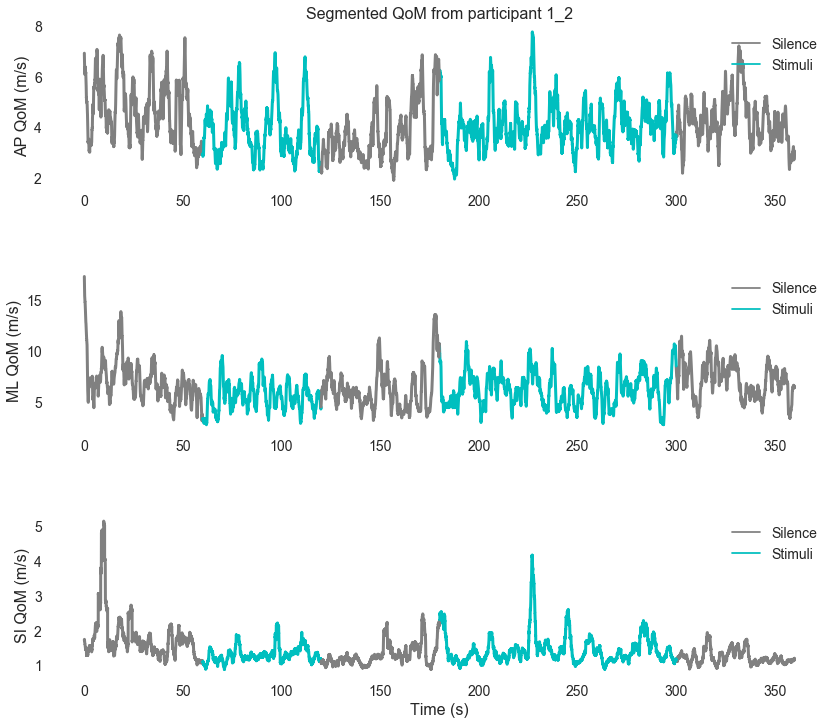

In [156]:
#Plotting segmented QoM in the three directions with color-coded conditions for one participant
f = plt.figure(figsize=(14,12))
hfont = {'fontname':'Helvetica'}

axX = plt.subplot(3, 1, 1)
axX.set_facecolor("white")

plt.title('Segmented QoM from participant 1_2', fontsize=16)

for i in range(0,2):
  axX.plot(QoMX_smooth_segmented_sil[1][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments participant 1_2
for j in range(2,5):
  axX.plot(QoMX_smooth_segmented_sorted[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2

axX.plot(QoMX_smooth_segmented_sorted[1][1][2], 'gray', lw=3, label='_nolegend_') #plotting silence middle segment participant 1_2

  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('AP QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axZ = plt.subplot(3, 1, 2)
axZ.set_facecolor("white")
for i in range(0,2):
  axZ.plot(QoMY_smooth_segmented_sil[1][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments participant 1_2
for j in range(2,5):
  axZ.plot(QoMY_smooth_segmented_sorted[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2

axZ.plot(QoMY_smooth_segmented_sorted[1][1][2], 'gray', lw=3, label='_nolegend_') #plotting silence middle segments participant 1_2


plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('ML QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axY = plt.subplot(3, 1, 3)
axY.set_facecolor("white")
for i in range(0,2):
  axY.plot(QoMZ_smooth_segmented_sil[1][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments participant 1_2
for j in range(2,5):
  axY.plot(QoMZ_smooth_segmented_sorted[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2

axY.plot(QoMZ_smooth_segmented_sorted[1][1][2], 'gray', lw=3, label='_nolegend_') #plotting silence middle segments participant 1_2
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('SI QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)

plt.subplots_adjust(hspace=0.5)



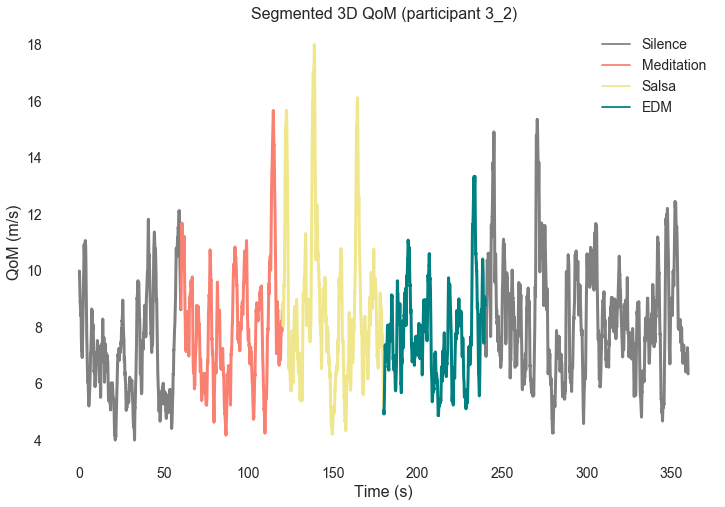

In [168]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant

fig8, ax8 = plt.subplots(1)
fig8.set_figheight(8)
fig8.set_figwidth(12)
ax8.set_facecolor("white")
for i in range(0,2):
  ax8.plot(QoM_smooth_segmented_sil[4][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoM_smooth_segmented_sorted[4][1][2], 'gray', lw=3, label='_nolegend_') #plotting middle silence
ax8.plot(QoM_smooth_segmented_sorted[4][2][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sorted[4][3][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sorted[4][4][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Meditation", color='salmon')
plt.plot([], label="Salsa", color='khaki')
plt.plot([], label="EDM", color='teal')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.title('Segmented 3D QoM (participant 3_2)', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

## Visualizing the stimuli

In [116]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant AND stimuli waveforms

#Loading stimuli files with librosa

y1, sr1 = librosa.load('path_meditation')
y2, sr2 = librosa.load('path_salsa')
y3, sr3 = librosa.load('path_edm')


fig = plt.figure(figsize=(16,12))
grid = plt.GridSpec(20, 7, wspace=0.5, hspace=0.5)


plt.subplot(grid[12:19,0:2])
librosa.display.waveplot(y1, sr=sr1, color='salmon')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[12:19,2:4])
librosa.display.waveplot(y2, sr=sr2, color='khaki')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[12:19,4:6])
librosa.display.waveplot(y3, sr=sr3, color='teal')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


ax8 = plt.subplot(grid[0:10,0:6])

for i in range(0,2):
  ax8.plot(QoM_smooth_segmented_sil[5][i][2], 'gray', lw=3, label='_nolegend_') #plotting silences - group 5_participant 2

ax8.plot(QoM_smooth_segmented_sorted[5][1][2], 'gray', lw=3, label='_nolegend_') #plotting middle silence
ax8.plot(QoM_smooth_segmented_sorted[5][2][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sorted[5][3][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sorted[5][4][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Meditaion", color='salmon')
plt.plot([], label="Salsa", color='khaki')
plt.plot([], label="EDM", color='teal')


plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.title('Segmented QoM (participant 5_2)', fontsize=16)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=16)
plt.legend(loc='upper left', fontsize=14, ncol=2)
plt.tight_layout()
fig.savefig("segmentsqom_stimuli.pdf", bbox_inches='tight')


NameError: name 'librosa' is not defined

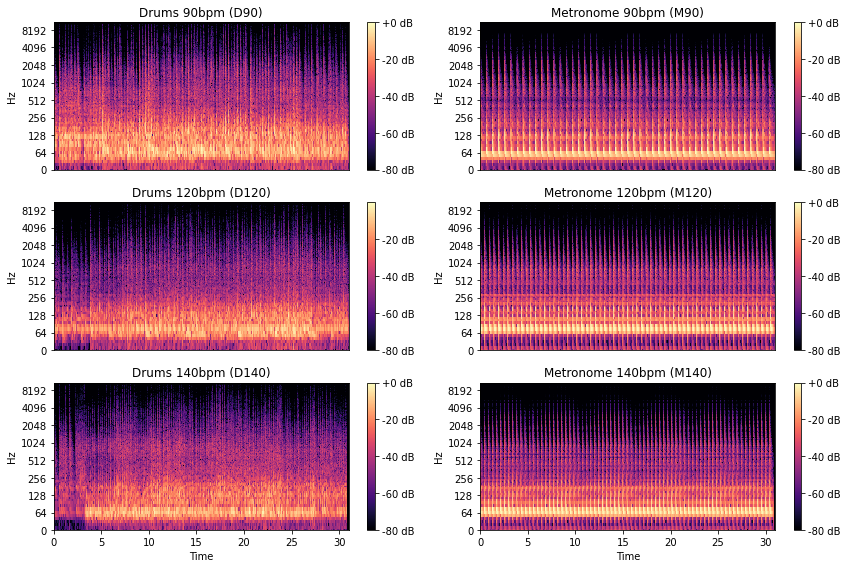

In [ ]:
#Generating spectrograms for all stimuli

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)


fig = plt.figure(figsize=(12,8))

plt.subplot(3, 1, 1)
librosa.display.specshow(D1, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Meditation')

plt.subplot(3, 1, 2)
librosa.display.specshow(D2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Salsa')

plt.subplot(3, 1, 3)
librosa.display.specshow(D3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('EDM')


plt.tight_layout()

fig.savefig("spectrograms_stimuli.pdf", bbox_inches='tight')
